# Assigment 1
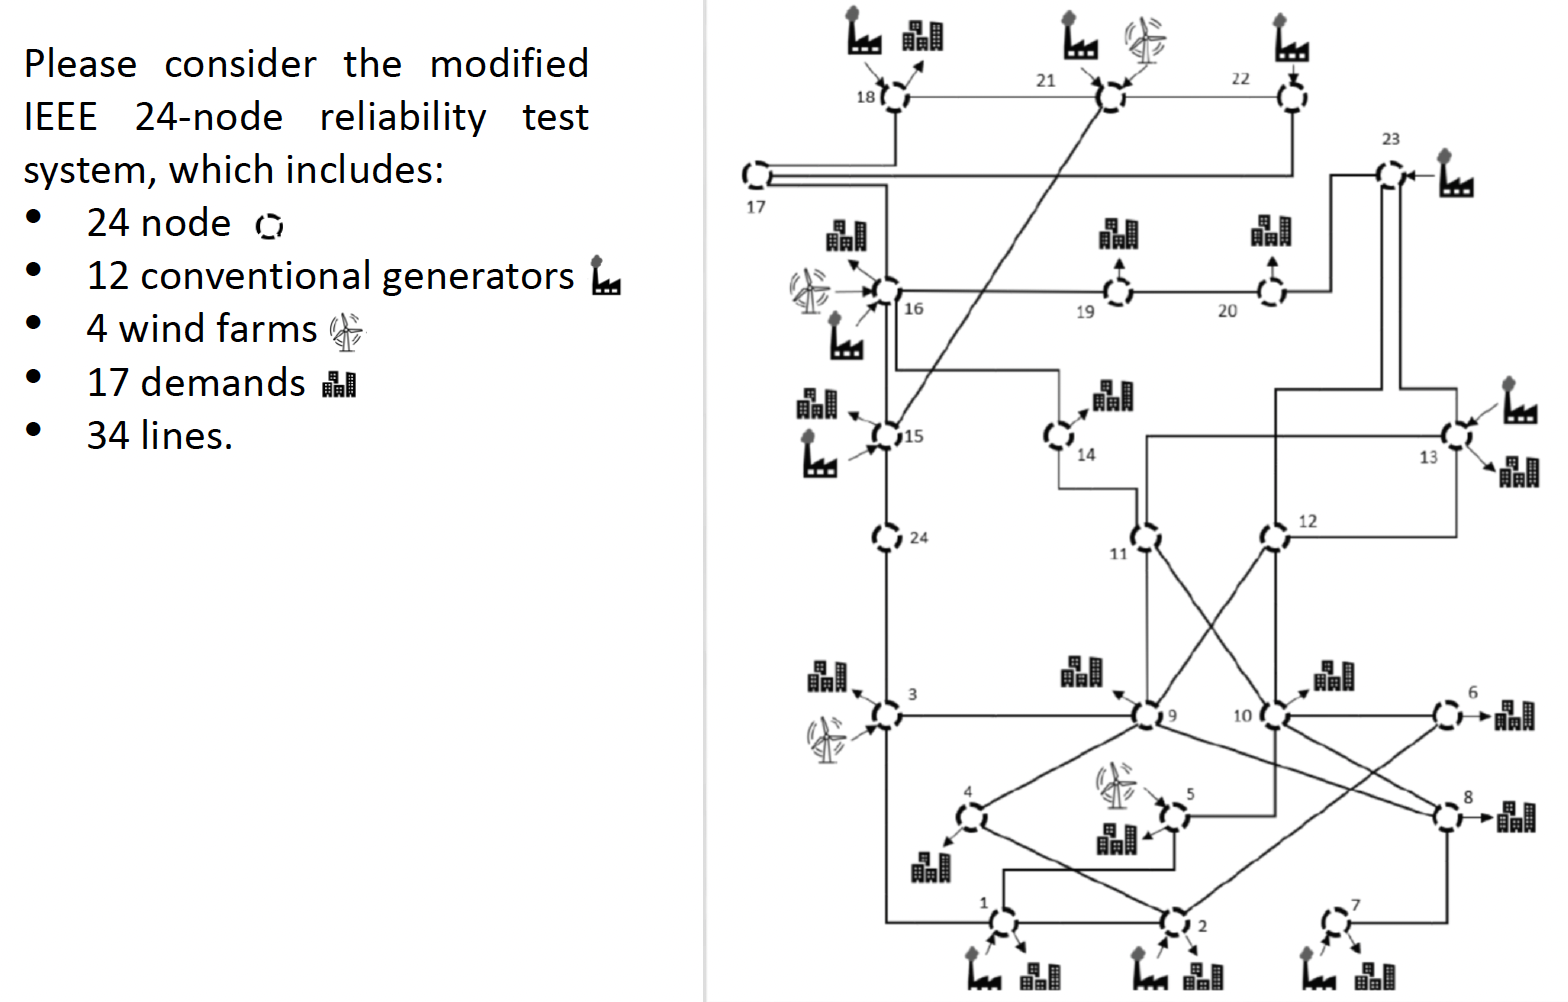

In [15]:
# Import Data

## Conventional Generators data
Conventional_generators = [
        1 2 7 13 15 15 16 18 21 22 23 23;
        13.32 13.32 20.7 20.93 26.11 10.52 10.52 6.02 5.47 7 10.52 10.89;
        1.68 1.68 3.30 4.07 1.89 5.48 5.48 4.98 5.53 8.00 3.45 5.11;
        2.32 2.32 4.67 3.93 3.11 3.52 3.52 5.02 4.97 6.00 2.52 2.89;
        106.4 106.4 245 413.7 42 108.5 108.5 280 280 210 217 245;
        48 48 84 216 42 36 36 60 60 48 72 48;
        48 48 84 216 42 36 36 60 60 48 72 48;
    ]
##  Wind Farms data

Wind_farms = [
    3 5 16 21;
    500 500 300 300;
    120.54 115.52 53.34 38.16;
]

## Demands
Demands = [
    1 2 3 4 5 6 7 8 9 10 13 14 15 16 18 19 20;
    84 75 139 58 55 106 97 132 135 150 205 150 245 77 258 141 100;
    500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500;
    ]

## Transmission_lines Data
Transmission_fir = [
    1 1 1 2 2 3 3 4 5 6 7 8 8 9 9 10 10;
    2 3 5 4 6 9 24 9 10 10 8 9 10 11 12 11 12;
    0.0146 0.2253 0.0907 0.1356 0.205 0.1271 0.084 0.111 0.094 0.0642 0.0652 0.1762 0.1762 0.084 0.084 0.084 0.084;
    175 175 350 175 175 175 400 175 350 175 350 175 175 400 400 400 400;
]

Transmission_sec =[
    11 11 12 12 13 14 15 15 15 16 16 17 17 18 19 20 21;
    13 14 13 23 23 16 16 21 24 17 19 18 22 21 20 23 22;
    0.0488 0.0426 0.0488 0.0985 0.0884 0.0594 0.0172 0.0249 0.0529 0.0263 0.0234 0.0143 0.1069 0.0132 0.0203 0.0112 0.0692;
    500 500 500 500 250 250 500 400 500 500 500 500 500 1000 1000 1000 500;
]

Transmission_lines = hcat(Transmission_fir, Transmission_sec)

# Get parameters from Data
## number of Conventional_generators
N_G = size(Conventional_generators,2)
N_G = Int64.(N_G)
## number of Wind_farms
N_W = size(Wind_farms,2)
## Number of Demands
N_D = size(Demands,2)
## Number of Transmission_lines
N_l = size(Transmission_lines,2)
## Number of nodes
(N_n, ) = findmax(Transmission_lines[1:2,:])
N_n = Int64.(N_n)
## Number of zones
N_a = 2 

## Susceptance of lines
Susceptance = 1 ./ Transmission_lines[3,:]

P_cg_max = Conventional_generators[5,1:end]
P_cg_min = zeros(N_G)

P_wt_max = Wind_farms[3,:]
P_wt_min = zeros(N_W)

P_dem_max = Demands[2,:]
P_dem_min = zeros(N_D);

##
U = (Demands[2,:] + ones(N_D) *45)'

C = (Conventional_generators[5,1:end]/2)'

T = zeros(4)'

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0

## Functions¶

In [4]:
function swaprow!(x,i,j)
         for k in axes(x,2)
           idata = x[i,k]
           x[i,k] = x[j,k]
           x[j,k] = idata
         end
       end

function getbuscxn(Transmission_lines,N_n)
  X = Transmission_lines[1:2,:]
    swaprow!(X,1,2)
    Ωₙ = Vector{Vector{Int8}}()
    Ω_idx =  Vector{Vector{Int8}}()
        for i in 1:N_n
                x = Transmission_lines[1:2,:]
                a = findall(x -> x==i, x)
                b = getindex.(a, 2)
                push!(Ωₙ,X[a])
                push!(Ω_idx,b)
        end
        return Ωₙ, Ω_idx
end

function getelmcxt(Demands, Conventional_generators, Wind_farms, N_n)

    d = Vector{Vector{Int8}}()
    y1 = copy(Demands[1,:])
            for i in 1:N_n
                a = findall(y1 -> y1==i, y1)
                push!(d,a)
            end

    g = Vector{Vector{Int8}}()
    y2 = copy(Conventional_generators[1,:])
            for i in 1:N_n
                a = findall(y2 -> y2==i, y2)
                push!(g,a)
            end

    w = Vector{Vector{Int8}}()
    y = copy(Wind_farms[1,:])
            for i in 1:N_n
                a = findall(y -> y==i, y)
                push!(w,a)
            end

return d,g,w
end

function getelmzone(Demands, Conventional_generators, Wind_farms, N_n)

  (d,g,w) = getelmcxt(Demands, Conventional_generators, Wind_farms, N_n)
    
    zone_A =[1,2,3,4,5,6,7,8,9,10,11,12,13]
    zone_B =[14,15,16,17,18,19,20,21,22,23,24]

    d1 = copy.(d)
    a = []
    for i in zone_A
        a = vcat(a,d1[i])
    end
    d2 = copy.(d)
    b = []
    for i in zone_B
        b = vcat(b,d2[i])
    end
    d_z =[[a];[b]]
    
    g1 = copy.(g)
    a = []
    for i in zone_A
        a = vcat(a,g1[i])
    end
    g2 = copy.(g)
    b = []
    for i in zone_B
        b = vcat(b,g2[i])
    end
    g_z =[[a];[b]]
    
    w1 = copy.(w)
    a = []
    for i in zone_A
        a = vcat(a,w1[i])
    end
    w2 = copy.(w)
    b = []
    for i in zone_B
        b = vcat(b,w2[i])
    end
    w_z =[[a];[b]]
    
return d_z, g_z, w_z
end

getelmzone (generic function with 1 method)

## Uniform Price

In [10]:
using JuMP
using GLPK
simple_model = Model(GLPK.Optimizer)

@variable(simple_model, P_G[1:N_G] >= 0)
@variable(simple_model, P_W[1:N_W] >= 0)
@variable(simple_model, P_D[1:N_D] >= 0)

@constraint(simple_model, cg_con[i=1:N_G], P_cg_min[i] <= P_G[i] <= P_cg_max[i])
@constraint(simple_model, wt_con[i=1:N_W], P_wt_min[i] <= P_W[i] <= P_wt_max[i])
@constraint(simple_model, dem_con[i=1:N_D], P_dem_min[i] <= P_D[i] <= P_dem_max[i])

@constraint(simple_model, balance_con, - sum(P_D) + sum(P_G) + sum(P_W) .== 0)

@objective(simple_model, Max, - T*P_W - C*P_G + U*P_D)


#print(simple_model)
optimize!(simple_model)
@show termination_status(simple_model)
@show primal_status(simple_model)
@show dual_status(simple_model)
@show objective_value(simple_model)
@show value.(P_G)
@show value.(P_W)
@show value.(P_D)
λ = shadow_price(balance_con);

#revenue and profit
R_G_unif = value.(P_G) * λ
Production_cost = Conventional_generators[2,:]
cost_fuel = Production_cost .* value.(P_G)

Profit_G_unif = R_G_unif - cost_fuel

R_W_unif = value.(P_W) * λ
Profit_W_unif = R_W_unif

termination_status(simple_model) = MathOptInterface.OPTIMAL
primal_status(simple_model) = MathOptInterface.FEASIBLE_POINT
dual_status(simple_model) = MathOptInterface.FEASIBLE_POINT
objective_value(simple_model) = 253295.69
value.(P_G) = [106.4, 106.4, 245.0, 0.0, 42.0, 108.5, 108.5, 141.64, 0.0, 210.0, 217.0, 245.0]
value.(P_W) = [120.54, 115.52, 53.34, 38.16]
value.(P_D) = [0.0, 0.0, 139.0, 0.0, 0.0, 106.0, 97.0, 132.0, 135.0, 150.0, 205.0, 150.0, 245.0, 0.0, 258.0, 141.0, 100.0]


4-element Vector{Float64}:
 16875.600000000002
 16172.8
  7467.6
  5342.4

## Nodal Price

In [35]:
(d,g,w) = getelmcxt(Demands, Conventional_generators, Wind_farms, N_n)
(Ωₙ,Ω_idx) = getbuscxn(Transmission_lines,N_n);

## Matrice delle suscettanze
B = zeros((N_n, N_n))
for i = 1:N_n
    (N_c,) = size(Ωₙ[i])
    for j in 1:N_c
        col = Ωₙ[i][j]
        B[i,col] = Susceptance[Ω_idx[i][j]]
    end
end

# Vincolo Potenza massima
F = zeros((N_n, N_n))
for i in 1:N_l
    a = Int8.(Transmission_lines[1,i])
    b = Int8.(Transmission_lines[2,i])
    c = copy(Transmission_lines[4,i])
    F[a,b] = c
    F[b,a] = c
end

using JuMP
using GLPK


nodal_model = Model(GLPK.Optimizer)

@variable(nodal_model, P_G[1:N_G] >= 0)
@variable(nodal_model, P_W[1:N_W] >= 0)
@variable(nodal_model, P_D[1:N_D] >= 0)
@variable(nodal_model, Θ[1:N_n])

@constraint(nodal_model, cg_con[i=1:N_G], P_cg_min[i] <= P_G[i] <= P_cg_max[i])
@constraint(nodal_model, wt_con[i=1:N_W], P_wt_min[i] <= P_W[i] <= P_wt_max[i])
@constraint(nodal_model, dem_con[i=1:N_D], P_dem_min[i] <= P_D[i] <= P_dem_max[i])

pf = @expression(nodal_model,[i=1:N_n, j=1:N_n], B[i,j]*(Θ[i]-Θ[j]))
@constraint(nodal_model, bal_con[i=1:N_n], sum(P_D[d[i]]) + sum(pf[i,:]) - sum(P_G[g[i]]) - sum(P_W[w[i]]) .== 0)

@constraint(nodal_model, max_flow_con[i=1:N_n, j=1:N_n], -F[i,j] <= B[i,j]*(Θ[i]-Θ[j]) <= +F[i,j])

@constraint(nodal_model, ang_ref, Θ[1] .== 0)

@objective(nodal_model, Max, - T*P_W - C*P_G + U*P_D)

#print(nodal_model)
optimize!(nodal_model)
@show termination_status(nodal_model)
@show primal_status(nodal_model)
@show dual_status(nodal_model)
@show objective_value(nodal_model)
@show value.(P_G)
@show value.(P_W)
@show value.(P_D)
@show value.(Θ);

## Market Clearing Price
λₙ = Vector{Float64}(undef,N_n)
#λₙ = zeros(N_n)#Vector{Float64}(undef,N_n)
for i = 1:N_n
    λₙ[i] = shadow_price(bal_con[i])
end
λₙ

#revenue and profit
R_G_nod = zeros(N_G)
for i = 1:N_G
    R_G_nod[i] = value.(P_G[i]) .* λₙ[Int64.(Conventional_generators[1,i])]
end

Production_cost = Conventional_generators[2,:]
cost_fuel = Production_cost .* value.(P_G)
Profit_G_nod = R_G_nod - cost_fuel

R_W_nod = zeros(N_W)
for i = 1:N_W
    R_W_nod[i] = value.(P_W[i]) .* λₙ[Int64.(Wind_farms[1,i])]
end
Profit_W_nod = R_W_nod

termination_status(nodal_model) = MathOptInterface.OPTIMAL
primal_status(nodal_model) = MathOptInterface.FEASIBLE_POINT
dual_status(nodal_model) = MathOptInterface.FEASIBLE_POINT
objective_value(nodal_model) = 253295.69
value.(P_G) = [106.4, 106.4, 245.0, 0.0, 42.0, 108.5, 108.5, 0.0, 141.64000000000067, 210.0, 217.0, 245.0]
value.(P_W) = [120.54, 115.52, 53.34, 38.16]
value.(P_D) = [0.0, 0.0, 139.0, 0.0, 0.0, 106.0, 97.0, 132.0, 135.0000000000005, 150.0, 205.0, 150.0, 245.0, 0.0, 258.0, 141.0, 100.0]
value.(Θ) = [4.295059212150455e-14, -0.5299174456190879, -9.884730514459369, -8.808329443812056, -2.379119692882765, -17.267240738709678, -4.585093079125965, -14.234693079125964, -15.584905637023112, -15.703680521228785, -15.877318968983516, -13.491628540832279, -16.110824168208442, -15.909835245063665, -7.224172394718868, -7.045174841288096, -6.301607654513202, -7.211779464452892, -7.758148855617745, -5.514369047536202, -4.6463380582433755, 3.524736012955533, -3.1564215672153506, -8.2522

4-element Vector{Float64}:
 16875.599999999995
 16172.799999999992
  7467.5999999999985
  5342.4

## Zonal congestioned

In [36]:
(d_z, g_z, w_z) = getelmzone(Demands, Conventional_generators, Wind_farms, N_n) # Ψₐ
Ωₐ = [[2],[1]] # Ωₐ

## calculate the value of ATC (Available Transfer Capacities) between zones

N_a = 2
zone_A =[1,2,3,4,5,6,7,8,9,10,11,12,13]
zone_B =[14,15,16,17,18,19,20,21,22,23,24]
ATC = zeros(N_a,N_a)
cxn_line = [7,18,21,22]
ATC[1,2] = sum(Transmission_lines[4,cxn_line])
ATC[2,1] = ATC[1,2]

ATC[1,2] = 270.0
ATC[2,1] = ATC[1,2]
vector_model = Model(GLPK.Optimizer)

@variable(vector_model, P_G[1:N_G] >= 0)
@variable(vector_model, P_W[1:N_W] >= 0)
@variable(vector_model, P_D[1:N_D] >= 0)
@variable(vector_model, f_ab[1:N_a,1:N_a])

@constraint(vector_model, cg_con[i=1:N_G], P_cg_min[i] <= P_G[i] <= P_cg_max[i])
@constraint(vector_model, wt_con[i=1:N_W], P_wt_min[i] <= P_W[i] <= P_wt_max[i])
@constraint(vector_model, dem_con[i=1:N_D], P_dem_min[i] <= P_D[i] <= P_dem_max[i]);


@constraint(vector_model, bal_con[i=1:N_a], sum(P_D[d_z[i]]) + sum(f_ab[i,:]) - sum(P_G[g_z[i]]) - sum(P_W[w_z[i]]) .== 0)
@constraint(vector_model, trans[i=1:N_a,j=1:N_a], f_ab[i,j] == -f_ab[j,i])

@constraint(vector_model, flow_trans[i=1:N_a,j=1:N_a], - ATC[i,j] <= f_ab[i,j] <= ATC[i,j])

@objective(vector_model, Max, - T*P_W - C*P_G + U*P_D)

#print(vector_model)
optimize!(vector_model)
@show termination_status(vector_model)
@show primal_status(vector_model)
@show dual_status(vector_model)
@show objective_value(vector_model)
@show value.(P_G)
@show value.(P_W)
@show value.(P_D)
@show value.(f_ab)

## Market Clearing Price
λₐ = Vector{Float64}(undef,N_a)
for i = 1:N_a
    λₐ[i] = shadow_price(bal_con[i])
end
λₐ

#revenue and profit
R_G_zon = zeros(N_G)
for i = 1:N_G
    R_G_zon[i] = value.(P_G[i]) .* λₙ[Int64.(Conventional_generators[1,i])]
end

Production_cost = Conventional_generators[2,:]
cost_fuel = Production_cost .* value.(P_G)
Profit_G_zon = R_G_zon - cost_fuel

R_W_zon = zeros(N_W)
for i = 1:N_W
    R_W_zon[i] = value.(P_W[i]) .* λₙ[Int64.(Wind_farms[1,i])]
end
Profit_W_zon = R_W_zon

termination_status(vector_model) = MathOptInterface.OPTIMAL
primal_status(vector_model) = MathOptInterface.FEASIBLE_POINT
dual_status(vector_model) = MathOptInterface.FEASIBLE_POINT
objective_value(vector_model) = 253295.41
value.(P_G) = [106.4, 106.4, 245.0, 0.0, 42.0, 108.5, 108.5, 141.5, 0.0, 210.0, 217.0, 245.0]
value.(P_W) = [120.54, 115.52, 53.34, 38.16]
value.(P_D) = [0.0, 0.0, 139.0, 0.0, 0.0, 106.0, 96.85999999999997, 132.0, 135.0, 150.0, 205.0, 150.0, 245.0, 0.0, 258.0, 141.0, 100.0]
value.(f_ab) = [0.0 -270.0; 270.0 0.0]


4-element Vector{Float64}:
 16875.599999999995
 16172.799999999992
  7467.5999999999985
  5342.4

In [43]:
import Pkg; 
Pkg.add("Plots")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v2.1.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed GR_jll ─────────────────────── v0.63.1+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed EarCut_jll ─────────────────── v2.2.3+0
   Installed Grisu ──────────────────────── v1.0.2
   Installed RelocatableFolders ─────────── v0.1.3
   Installed Measures ───────────────────── v0.3.1
   Installed Formatting ─────────────────── v0.4.2
   Installed Xorg_libpthread_stubs_jll ──── v0.1.0+3
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed PlotUtils ──────────────────── v1.1.2
   Installed Contour ────────────────────── v0.5.7
   Installed Rec

In [46]:
using Plots
giorni = collect(1:10)
fatturato = rand(10)
p = bar((giorni,giorni),fatturato)
ylabel!("Fatturato [Dollari]")
xlabel!("Tempo (Giorni)")
title!("Fatturato Giornaliero")
savefig(p,"barplot.png")

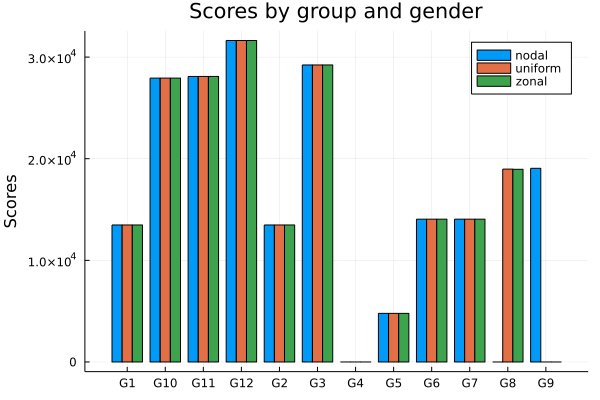

In [72]:
#import Pkg
#Pkg.add("StatPlots")
#Pkg.add("StatsPlots")  # install the package if it isn't installed
using StatsPlots
mn = [20, 35, 30, 35, 27,25, 32, 34, 20, 25]
pr = hcat(Profit_G_unif,Profit_G_nod,Profit_G_zon)

sx = repeat(["uniform", "nodal", "zonal"], inner = N_G)
nam = repeat("G" .* string.(1:N_G), outer = 3)

#using StatPlots
groupedbar(nam, pr,  group = sx, ylabel = "Scores", 
        title = "Scores by group and gender")

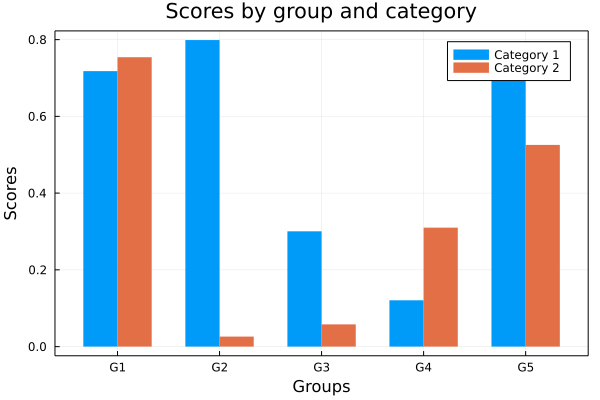

In [71]:
ctg = repeat(["Category 1", "Category 2"], inner = 5)
nam = repeat("G" .* string.(1:5), outer = 2)

groupedbar(nam, rand(5, 2), group = ctg, xlabel = "Groups", ylabel = "Scores",
        title = "Scores by group and category", bar_width = 0.67,
        lw = 0, framestyle = :box)


In [64]:
pr = vcat(Profit_G_unif,Profit_G_nod,Profit_G_zon)

36-element Vector{Float64}:
 13478.752
 13478.752
 29228.5
     0.0
  4783.38
 14048.58
 14048.58
 18976.9272
     0.0
 27930.0
 28097.16
 31631.95
 13478.752
     ⋮
 13478.752
 13478.752
 29228.49999999997
     0.0
  4783.379999999999
 14048.579999999996
 14048.579999999996
 18958.17
     0.0
 27930.0
 28097.15999999998
 31631.94999999998